# <p style="text-align: center;">MIS 382N: Advanced Predictive Modeling</p>
# <p style="text-align: center;">Assignment 3</p>
## <p style="text-align: center;">Total points: 80 </p>
## <p style="text-align: center;">Due: Mon, October 24, by 11:59pm</p>


Your homework should be written in a **Jupyter notebook**. Please submit **only one** ipynb file from each group, and include the names of all the group members. Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting.

# Question 1 - Stochastic Gradient Descent (10pts)

1. Using stochastic gradient descent, derive the coefficent updates for all 4 coefficients of the model: $$ y = w_0 + w_1*x_1 + w_2*x_1^2 + w_3*x_2 $$ Hint: start from the cost function (Assume sum of squared error). If you write the math by hand, submit that as a separate file and make a reference to it in your notebook or include the image in your notebook.
2. Write Python code for an SGD solution to the non-linear model $$ y = w_0 + w_1*x_1 + w_2*x_1^2 + w_3*x_2$$ Try to format similarly to scikit-learn's models. There should be a _fit_ function that takes parameters X, y, learning rate, and number of iterations, and a _predict_ function that takes an X value (optionally, an array of values). Use your new gradient descent regression to predict the data given in 'samples.csv', for 10 epochs, using learning rates: [.0001, .001, .01] . Plot MSE and the $w$ parameters as a function of epoch count.

### Answer

#### Part 1

We update our weight, $w_{j}$, using the following rule:
$$w_{j} = w_{j} - \eta\Delta w_{j} $$

where $\eta$ is the learning rate, $\Delta w_{j} = \frac {\delta E_{n}}{\delta w_{j}}$ and $E_{n}$ is our cost function. 

The math below shows how $\Delta w_{j}$ can be derived.

---

$Y$ is:

 
$$ y = w_0 + w_1x_1 + w_2x_1^2 + w_3x_2$$


Let $t_{n}$ be a test data point.

We can rewrite our cost function, $E_{n}$ as:

$$ E_{n} = (t_{n} - y_{n})^2 $$

Our coefficient update, $\Delta w$, is the partial derivative $\frac {\delta E_{n}}{\delta w_{j}}$. Using the chain rule and including $\eta$, we get:

$$\frac {\delta E_{n}}{\delta w_{0}} = -2\eta* (t_{n} - y_{n}) $$

$$\frac {\delta E_{n}}{\delta w_{1}} = -2\eta * x_{1}(t_{n} - y_{n}) $$

$$\frac {\delta E_{n}}{\delta w_{2}} = -2\eta * x_{1}^2(t_{n} - y_{n}) $$

$$\frac {\delta E_{n}}{\delta w_{3}} = -2\eta * x_{2}(t_{n} - y_{n}) $$

Thus, our final weight updates are:

$$ w_{0} = w_{0} + 2\eta* (t_{n} - y_{n}) $$
$$ w_{1} = w_{1} + 2\eta * x_{1}(t_{n} - y_{n})$$
$$ w_{2} = w_{2} + 2\eta * x_{1}^2(t_{n} - y_{n}) $$
$$ w_{3} = w_{3} + 2\eta * x_{2}(t_{n} - y_{n}) $$


#### Part 2

The steps from building the ```StochasticGradient()``` class to making predictions and plotting the parameters as a function of epoch are below.

**Load data**

In [90]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
from sklearn.utils import shuffle

# Read in file
data_q1 = pd.read_csv("samples.csv",names=['index','x1','x2','target'],header=0)

# Split up features and target
features_q1 = data_q1[['x1','x2']]
target_q1 = data_q1['target']

# Make data into array
X, y = np.array(features_q1), np.array(target_q1)

**Build class for Stochastic Gradient descent**

The ```StochasticGradient()``` class has functions for ```fit``` and ```predict.```

In [85]:
class StochasticGradient():
    
    
    def __init__(self, learning, iterations, epoch):
        """The learning rate, number of iterations (e.g. data points used), and 
        epochs (e.g. number of times to repeat)"""
        self.learning = learning
        self.iterations = iterations
        self.epoch = epoch

    def fit(self, X, y):
        """The fit function takes X and y as arrays"""
        
        weights = np.array([.0005]*4)
        
        w0 = weights[0]
        w1 = weights[1]
        w2 = weights[2]
        w3 = weights[3]
        
        # Randomize training data
        train, target = shuffle(X,y)  

        self.weights_epoch = []
        
        for j in range(self.epoch): 
            for i in range(self.iterations):
                x1 = train[i][0]
                x2 = train[i][1]
                eta = self.learning
                t = target[i]
                y = w0 + (w1*x1) + (w2*x1**2) + (w3*x2)

            # Make weight updates

                w0 = w0 + 2*(t-y)*eta
                w1 = w1 + 2*(t-y)*x1*eta
                w2 = w2 + 2*(t-y)*(x1**2)*eta
                w3 = w3 + 2*(t-y)*x2*eta

                weights = [w0,w1,w2,w3]
                
            # Reshuffle data after each epoch
            train, target = shuffle(train,target)
            
            # Store weights of every epoch into a list
            self.weights_epoch.append((j+1,weights))

        self.weights = weights
            
    def predict(self, X_test, weights = None):
        """The predict function takes in an array for X and optional weights. Default values
        are the weights from fitting the model. To see the predicted values, use self.predictions"""
        
        # Define parameters to calculate hypothesis
        if weights == None:
            w0 = self.weights[0]
            w1 = self.weights[1]
            w2 = self.weights[2]
            w3 = self.weights[3]
        else:
            w0 = weights[0]
            w1 = weights[1]
            w2 = weights[2]
            w3 = weights[3]
        
        eta = self.learning
        
        test = X_test
        
        # Create list to store predictions
        predictions = []
        mse_store = []

        # Store prediction of every point in list
        for point in test:
            x1 = float(point[0])
            x2 = float(point[1])
            yhat = w0 + w1*x1 + w2*x1**2 + w3*x2
            
            predictions.append(yhat)
            
        self.predictions = predictions

            

**Fit the models**

Three models for the learning rates - ```.01,.001,.0001``` - are fitted. The predicted values are outputted as a DataFrame below.

In [94]:
# Fit model for each learning rate
sgd_01 = StochasticGradient(learning = .01, iterations = 40, epoch = 10)
sgd_01.fit(X, y)
sgd_01.predict(X)

sgd_001 = StochasticGradient(learning = .001, iterations = 40, epoch = 10)
sgd_001.fit(X, y)
sgd_001.predict(X)

sgd_0001 = StochasticGradient(learning = .0001, iterations = 40, epoch = 10)
sgd_0001.fit(X, y)
sgd_0001.predict(X)

predictions_q1 = {
    ".01":sgd_01.predictions,
    ".001":sgd_001.predictions,
    ".0001":sgd_0001.predictions,
    "Actual":y
}

# Show prediction results

pd.DataFrame(predictions_q1)


,.0001,.001,.01,Actual
0,1.621635,0.967715,9.981870e+275,0.916551
1,-12.534666,-11.157160,1.401751e+276,-11.135640
2,-12.768187,-10.873946,1.548842e+276,-10.801274
3,1.517111,0.751082,7.912000e+275,0.752401
4,-0.635259,-1.424111,9.185467e+275,-1.507111
5,-14.427485,-14.127965,1.413893e+276,-14.368052
6,-14.141442,-14.537238,1.428208e+276,-14.926405
7,-6.933836,-6.807272,6.767354e+275,-6.696970
8,-8.460977,-9.116421,9.785937e+275,-9.308390
9,-4.671865,-5.489690,7.921418e+275,-5.590497


**Prepare data for plotting**

In [87]:
# Create arrays for plots for each learning rate
mse_epoch_01 = []
w0_epoch_01 = []
w1_epoch_01 = []
w2_epoch_01 = []
w3_epoch_01 = []

mse_epoch_001 = []
w0_epoch_001 = []
w1_epoch_001 = []
w2_epoch_001 = []
w3_epoch_001 = []

mse_epoch_0001 = []
w0_epoch_0001 = []
w1_epoch_0001 = []
w2_epoch_0001 = []
w3_epoch_0001 = []

# Create indexes for epochs 1-10
epoch_list = [x for x in range(1,11)]
epoch_list = np.array(epoch_list)
mse_list = [mse_epoch_01, mse_epoch_001, mse_epoch_0001]

eta_list = [.01, .001, .0001]

w0_list = [w0_epoch_01, w0_epoch_001, w0_epoch_0001]
w1_list = [w1_epoch_01, w1_epoch_001, w1_epoch_0001]
w2_list = [w2_epoch_01, w2_epoch_001, w2_epoch_0001]
w3_list = [w3_epoch_01, w3_epoch_001, w3_epoch_0001]

weights_loop = [w0_list, w1_list, w2_list, w3_list]

# MSE - learning rates
for i in range(len(mse_list)):
#     for epoch, weights in sgd_01.weights_epoch: 
    for j in range(10):
        sgd_plot = StochasticGradient(learning = eta_list[i], iterations = 40, epoch = j)
        sgd_plot.fit(X,y)
        sgd_plot.predict(X)
        mse_plot = (sgd_plot.predictions - y)**2
        
        mse_list[i].append(np.mean(mse_plot))

    mse_list[i] = np.array(mse_list[i])
    
# Weights
for i in range(len(weights_loop)):
    for e in range(len(eta_list)):
        for j in range(10):
            sgd_plot = StochasticGradient(learning = eta_list[e], iterations = 40, epoch = j)
            sgd_plot.fit(X,y)
            
            weights_loop[i][e].append(sgd_plot.weights[i])

**Create the plots**

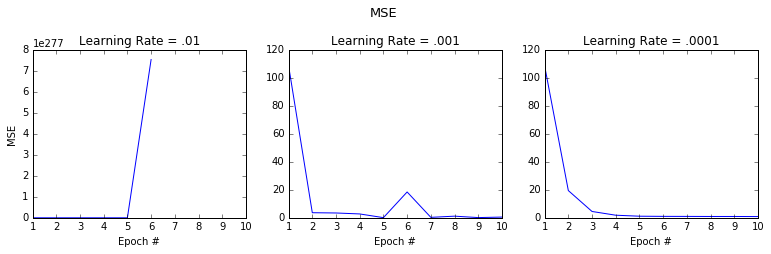

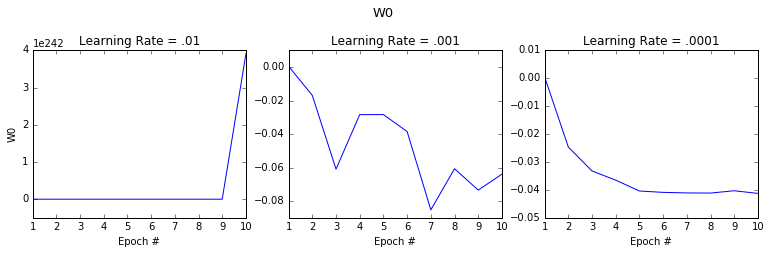

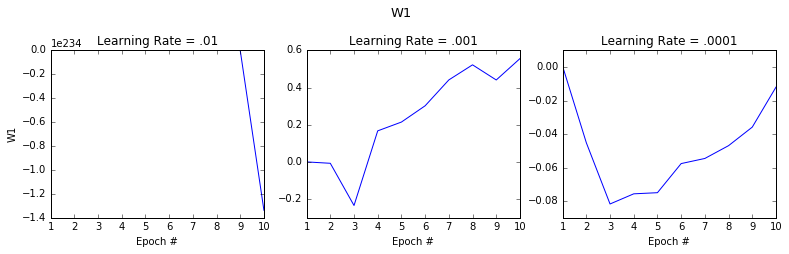

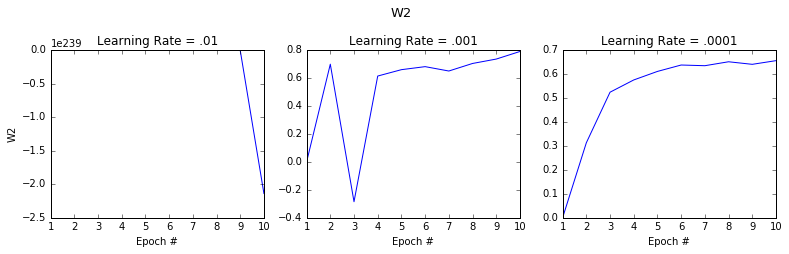

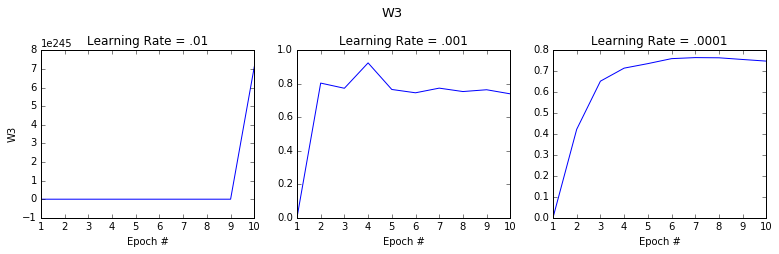

In [88]:
# Create plots for MSE
plt.figure(figsize=(12,4))

f, (ax1, ax2, ax3) = plt.subplots(1, 3)
f.suptitle("MSE", fontsize = 13, y = 1.1)
f.set_size_inches(13,3)

ax1.plot(epoch_list, mse_epoch_01)
ax1.set_title('Learning Rate = .01')
ax1.set_xlabel('Epoch #')
ax1.set_ylabel('MSE')
ax1.set_xlim(1,10)

ax2.plot(epoch_list, mse_epoch_001)
ax2.set_title('Learning Rate = .001')
ax2.set_xlabel('Epoch #')

ax3.plot(epoch_list, mse_epoch_0001)
ax3.set_title('Learning Rate = .0001')
ax3.set_xlabel('Epoch #')

plt.savefig('mse_q1.png')

# Create plots for weights

plot_title = ["W0","W1","W2","W3"]

# For each 
for i in range(4):
    plt.figure(figsize=(12,4))

    f, (ax1, ax2, ax3) = plt.subplots(1, 3)
    f.suptitle(plot_title[i], fontsize = 13, y = 1.1)
    f.set_size_inches(13,3)

    ax1.plot(epoch_list, weights_loop[i][0])
    ax1.set_title('Learning Rate = .01')
    ax1.set_xlabel('Epoch #')
    ax1.set_ylabel(plot_title[i])
    ax1.set_xlim(1,10)

    ax2.plot(epoch_list, weights_loop[i][1])
    ax2.set_title('Learning Rate = .001')
    ax2.set_xlabel('Epoch #')


    ax3.plot(epoch_list, weights_loop[i][2])
    ax3.set_title('Learning Rate = .0001')
    ax3.set_xlabel('Epoch #')
    
    plt.savefig('{}.png'.format(plot_title[i]))
    
    

# plt.savefig('weights.png')

# Question 2: Gradient Descent (5 pts)

Suppose we are trying to use gradient descent to minimize a cost function y = f(w) as shown in the figure below. This function is linearly decreasing between A and B, constant between B and C, quadratic between C and D and constant between D and E. Assume that we have 10000 data points in our training set. If we choose the starting point between B and C, will we be able to find the local minima? Explain your answer. If your answer is "Yes", can you give a bound on the number of iterations required to get to the local minima?

<img src="sgd.png">

#### Answer

If we use batch gradient descent and calculate weight updates using all 10,000 data points, we will not be able to find the local minima because $\Delta w_{j}$ for all $j$ will be 0, and the weights wouldn't update. However, we may be able to find the local minima using stochastic gradient descent because random data points are used to calculate weight updates and we would be able to get close to the local minima if we find the optimal parameters for the learning rate, iterations and epoch.

# Question 3: Multi-layer Perceptron regressor (15 points)

In this question, you will explore the application of Multi-layer Perceptron (MLP) regression using sklearn package in Python. We will use the same dataset used in HW2 Q5: Hitters.csv [here](https://rdrr.io/cran/ISLR/man/Hitters.html). 

Following code will load and split the data into training and test set using [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with **random state 42** and **test_size = 0.33**:

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import (train_test_split,KFold)
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('Hitters.csv')
label_name = 'Salary'
y = data[label_name]
X = data.drop(label_name,axis=1)
print X.shape

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state=42)

(263, 16)


One more thing to use in this problem is [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Instead of fitting a model on original data, use StandardScaler to make each feature centered ([Example](http://scikit-learn.org/stable/auto_examples/applications/plot_prediction_latency.html#sphx-glr-auto-examples-applications-plot-prediction-latency-py)). Whenever you have training and test data, fit a scaler on training data and use this scaler on test data. Here, scale only features (independent variables), not target variable y.

1) Use [sklearn.neural_nework.MLPRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor) to do a 5-fold cross validation using sklearn's [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold). The cross validation must be performed on the **training data**. Use following parameter settings for MLPRegressor:

    activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42,
    batch_size=40, learning_rate_init = 0.001
    
Now, consider two different settings for the number of hidden units:
    
   (a) *hidden_layer_sizes = (2,)* (b) *hidden_layer_sizes = (15,)*
    
   Report the average Root Mean Squared Error (RMSE) value based on your 5-fold cross validation for each model: (a) and (b) (6pts)
   
   
2) Now, using the same parameters used in part 1), train MLPRegressor models on whole training data and report RMSE score for both Train and Test set (Again, use StandardScaler). Which model works better, (a) or (b)? Briefly analyze the result in terms of the number of hidden units. (5pts)


3) MLPRegressor has a built-in attribute *loss\_curve\_* which returns the loss at each iteration. For example, if your model is named as *my_model* you can call it as *my\_model.loss\_curve\_* ([example](http://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_training_curves.html#sphx-glr-auto-examples-neural-networks-plot-mlp-training-curves-py)). Plot two curves for model (a) and (b) in one figure, where *X-axis* is iteration number and *Y-axis* is squared root of *loss\_curve\_* value. (4pts)

#### Answer

1)

```Average Train RMSE of 5-Fold CV, Hidden Layers = 2: 388.52
Average Train RMSE of 5-Fold CV, Hidden Layers = 15: 308.04```

2) The test RMSE for the model with 15 hidden layers was lower than that for the model with 2 hidden layers. Adding more hidden layers allowed the model to learn the complexity of the data set better.

```
Test RMSE, Hidden Layers = 2: 504.52
Test RMSE, Hidden Layers = 15: 418.60
```

3) The plot of the square root of the loss curve can be found below.

![alt text][q3]

[q3]:https://github.com/billy-yuan/MIS382N-APM/blob/master/HW3/Graphs/sqrt_loss_q3.png?raw=true


**Scale and center the data**

In [95]:
# Scale and center train data
scale_train = StandardScaler()
scale_train.fit(X_train)
X_train_std = pd.DataFrame(scale_train.transform(X_train))

# Scale and center test data
scale_test = StandardScaler()
scale_test.fit(X_test)
X_test_std = pd.DataFrame(scale_train.transform(X_test))

**Train models, split the data using KFold, and calculate training RMSE**

In [96]:
# Create RMSE function
def avg_rmse_calc(x,y):
    # x and y are arrays of equal length
    return np.mean((x-y)**2)**0.5

# Set parameters for neural network for hidden layer sizes of (2,) and (15,)
mlp_2 = MLPRegressor(hidden_layer_sizes=(2,),activation = 'tanh', solver = 'sgd', \
                     learning_rate='constant', random_state=42,batch_size=40, learning_rate_init = 0.001)

mlp_15 = MLPRegressor(hidden_layer_sizes=(15,),activation = 'tanh', solver = 'sgd', \
                      learning_rate='constant', random_state=42, batch_size=40, learning_rate_init = 0.001)

# Create 5 folds of training data
kf3 = KFold(n_splits=5, random_state=42)
kf3.get_n_splits(X_train)

# Create 2 lists to store the average rmse of each fold for each model
rmse_2 = []
rmse_15 = []

# Fit models
for train, test in kf3.split(X_train_std):
    ### fit and get rmse of hidden layer = 2
    mlp_2.fit(X_train_std.iloc[train], y_train.iloc[train])
    
    yhat_2 = mlp_2.predict(X_train_std.iloc[test])
    y_actual_2 = y_train.iloc[test]
    
    # append rmse values into list
    rmse_2.append(avg_rmse_calc(yhat_2, y_actual_2))
    
    ### fit and get rmse of hidden layer = 15
    
    mlp_15.fit(X_train_std.iloc[train], y_train.iloc[train])
    
    yhat_15 = mlp_15.predict(X_train_std.iloc[test])
    y_actual_15 = y_train.iloc[test]
    
    rmse_15.append(avg_rmse_calc(yhat_15, y_actual_15))

print "Average Train RMSE of 5-Fold CV, Hidden Layers = 2: {:.2f}".format(np.mean(rmse_2))
print "Average Train RMSE of 5-Fold CV, Hidden Layers = 15: {:.2f}".format(np.mean(rmse_15))


Average Train RMSE of 5-Fold CV, Hidden Layers = 2: 388.52
Average Train RMSE of 5-Fold CV, Hidden Layers = 15: 308.04


**Calculate test RMSE**

In [97]:
# Fit entire training data into model
mlp_2.fit(X_train_std, y_train)
mlp_15.fit(X_train_std, y_train)

# Calculate Test RMSE
# mlp_2.predict(X_test)
print "Test RMSE, Hidden Layers = 2: {:.2f}".format(avg_rmse_calc(y_test,mlp_2.predict(X_test_std)))
print "Test RMSE, Hidden Layers = 15: {:.2f}".format(avg_rmse_calc(y_test,mlp_15.predict(X_test_std)))

Test RMSE, Hidden Layers = 2: 504.52
Test RMSE, Hidden Layers = 15: 418.60


**Plot loss curves (uncomment to view)**

In [105]:
# fig, (ax1, ax2) = plt.subplots(1,2)

# fig.set_size_inches(12,5)
# ax1.set_title("Loss Curve, Hidden Layer = 2")
# ax1.plot(np.sqrt(mlp_2.loss_curve_))
# ax1.set_xlabel("Iteration")
# ax1.set_ylabel("Loss")

# ax2.set_title("Loss Curve, Hidden Layer = 15")
# ax2.plot(np.sqrt(mlp_15.loss_curve_))
# ax2.set_xlabel("Iteration")

# fig.savefig('loss_q3.png')

# Question 4 - Bayesian Classifiers (10 pts)

Download the Smarket dataset from Canvas. This contains about four years worth of daily prices for one stock. The goal is to predict whether or not the stock price will go up or down, and the features are the stock prices of the last five days.  
The code below loads the dataset and all necessary sklearn modules (not that you can't use more if you feel like it). Look up any module on the scikit-learn website for a full description.

1. The last 50 points will be the test dataset. For training, use the 1000 points prior to these 50 test points.
2. Train Linear Discriminant Analysis, Quadratic Discriminant Analysis, and (Gaussian) Naive Bayes. Extract the probability of the stock price going up for each row in the test set.
3. Plot the receiver operating characteristic (ROC) curve of each model, using the extracted probabilities and the true values for the test set. (3 pts)
4. Report the area under the ROC curve (AUC) for each model. (2 pts)
6. Justify the performance of each model, relative to the others. (1 pts)
7. Repeat steps 1-6, only using the prior 100 points for training. Explain the changes in model performance. (4 pts)

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
data = pd.read_csv('Smarket.csv', usecols=['Lag1','Lag2','Lag3','Lag4','Lag5','Direction'])

#### Answer

1. Refer to the code below.
2. Refer to the code below.
3. The ROC curve and the area can be found in the plot below. The area under the curve for each model is stated in the plot's legend. 
![alt text][q4_1000]
4. Using 1000 training points, the areas are:
```
LDA: 0.520
QDA: 0.628
Naive Bayes: 0.522
```
5. The QDA performed the best because the "separator" between the classes for "Up" and "Down" isn't perfectly linear. Below is a plot of Lag1 and Lag2, and the colors are for each class. The green is for "Up" and the red is for "Down." Observing the scatter plot between Lag1 and Lag2 in 2 dimensions, we cannot observe any "clustering" between the two classes. Assuming this is the case for all 5 dimensions, LDA would not perform much better than flipping a coin. Naive Bayes also struggles because the likelihood values used to estimate the posteriors do not provide much more information. As a result, the Naive Bayes essentially just predicts the priors.
![alt text][q4_lag]
6. The performance of all 3 models got worse, and the area under the ROC curve decreased as well. This is not surprising because we are training these models with fewer data points.
![alt text][q4_100]

[q4_1000]:https://github.com/billy-yuan/MIS382N-APM/blob/master/HW3/Graphs/roc_1000_q4.png?raw=true
[q4_lag]:https://github.com/billy-yuan/MIS382N-APM/blob/master/HW3/Graphs/lag1_vs_lag2_q4.png?raw=true
[q4_100]:https://github.com/billy-yuan/MIS382N-APM/blob/master/HW3/Graphs/roc_100_q4.png?raw=true

**Train models**

In [78]:
# Create binary target
data['target'] = data['Direction'].map(lambda x: 1 if (x == 'Up') else 0)

# Create train and test sets
X_q4 = data.drop(['Direction', 'target'], axis=1)
Y_q4 = data['target']

X_train_q4 = X_q4.iloc[-1050:-50,:]
X_test_q4 = X_q4.iloc[-50:,]

y_train_q4 = Y_q4.iloc[-1050:-50]
y_test_q4 = Y_q4.iloc[-50:]

# Train LDA
lda = LDA()
lda.fit(X_train_q4,y_train_q4 )
yhat_lda = lda.predict(X_test_q4)

# Train QDA
qda = QDA()
qda.fit(X_train_q4,y_train_q4 )
yhat_qda = qda.predict(X_test_q4)

# Train Gaussian NB
gb = GaussianNB()
gb.fit(X_train_q4, y_train_q4)
yhat_gb = gb.predict(X_test_q4)

**Plot ROC curves for the models using 1000 training points**

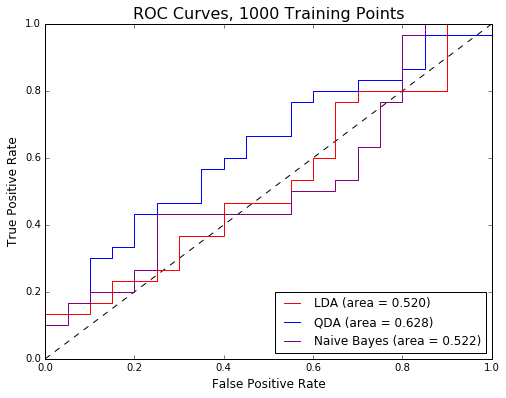

In [106]:
from sklearn import metrics

# Store probabilities of positive class (Up) in arrays
lda_prob = np.array([item[1] for item in lda.predict_proba(X_test_q4)])
qda_prob = np.array([item[1] for item in qda.predict_proba(X_test_q4)])
gb_prob = np.array([item[1] for item in gb.predict_proba(X_test_q4)])

fpr_lda, tpr_lda, thresholds = metrics.roc_curve(y_test_q4, lda_prob, pos_label=1)
fpr_qda, tpr_qda, thresholds = metrics.roc_curve(y_test_q4, qda_prob, pos_label=1)
fpr_gb, tpr_gb, thresholds = metrics.roc_curve(y_test_q4, gb_prob, pos_label=1)

# Calculate area under ROC curve
clf_q4 = [lda_prob, qda_prob, gb_prob]
roc_area = []
for clf in clf_q4:
    area = metrics.roc_auc_score(y_test_q4, clf)
    roc_area.append(area)

# Plots
plt.figure(figsize=(8,6))
plt.subplot(111)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)

labels_q4 = ['LDA','QDA','Naive Bayes']
fpr_list = [fpr_lda, fpr_qda, fpr_gb]
tpr_list = [tpr_lda, tpr_qda, tpr_gb]
color_q4 = ['red','blue','purple']

plt.plot([0,1],[0,1], linestyle='--', color='black')
for i in range(len(labels_q4)):
    plt.plot(fpr_list[i], tpr_list[i], color = color_q4[i], \
            label="{} (area = {:.3f})".format(labels_q4[i], roc_area[i]))


plt.legend(loc='lower right')
plt.title('ROC Curves, 1000 Training Points', fontsize = 16)

# plt.savefig('roc_1000_q4.png')

**Plot the ROC curves for the models using 100 data points**

In [15]:
# Repeat the same steps above using first 100 points

# Create training set using 100 points prior. Test remains the same
X_train_q4_100 = X_q4.iloc[-1150:-1050,:]
y_train_q4_100 = Y_q4.iloc[-1150:-1050]


# Train LDA
lda_100 = LDA()
lda_100.fit(X_train_q4_100,y_train_q4_100)
yhat_lda_100 = lda.predict(X_test_q4)

# Train QDA
qda_100 = QDA()
qda_100.fit(X_train_q4_100,y_train_q4_100)
yhat_qda_100 = qda.predict(X_test_q4)

# Train Gaussian NB
gb_100 = GaussianNB()
gb_100.fit(X_train_q4_100, y_train_q4_100)
yhat_gb_100 = gb_100.predict(X_test_q4)

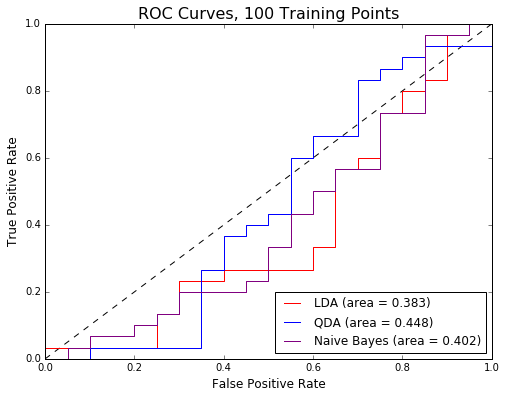

In [81]:
# Store probabilities of positive class (Up) in arrays
lda_prob_100 = np.array([item[1] for item in lda_100.predict_proba(X_test_q4)])
qda_prob_100 = np.array([item[1] for item in qda_100.predict_proba(X_test_q4)])
gb_prob_100 = np.array([item[1] for item in gb_100.predict_proba(X_test_q4)])

fpr_lda, tpr_lda, thresholds = metrics.roc_curve(y_test_q4, lda_prob_100, pos_label=1)
fpr_qda, tpr_qda, thresholds = metrics.roc_curve(y_test_q4, qda_prob_100, pos_label=1)
fpr_gb, tpr_gb, thresholds = metrics.roc_curve(y_test_q4, gb_prob_100, pos_label=1)

# Calculate area under ROC curve
clf_q4_100 = [lda_prob_100, qda_prob_100, gb_prob_100]
roc_area = [] # Store area under ROC curve in list
for clf in clf_q4_100:
    area = metrics.roc_auc_score(y_test_q4, clf)
    roc_area.append(area)

# Plots
plt.figure(figsize=(8,6))
plt.subplot(111)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)

labels_q4 = ['LDA','QDA','Naive Bayes']
fpr_list = [fpr_lda, fpr_qda, fpr_gb]
tpr_list = [tpr_lda, tpr_qda, tpr_gb]
color_q4 = ['red','blue','purple']

plt.plot([0,1],[0,1], linestyle='--', color='black')
for i in range(len(labels_q4)):
    plt.plot(fpr_list[i], tpr_list[i], color = color_q4[i], \
             label="{} (area = {:.3f})".format(labels_q4[i], roc_area[i]))


plt.legend(loc='lower right')
plt.title('ROC Curves, 100 Training Points', fontsize = 16)

plt.savefig('roc_100_q4.png')

**Misc**

In [107]:
# # This code is to create the plot used in the explanation for part 5.

# plt.figure(figsize=(8,6))
# x1_q4 = data['Lag1']
# x2_q4 = data['Lag2']

# up = [141/255., 219/255., 135/255.]
# down = [198/255., 31/255., 31/255.]

# classes = data['Direction']
# classes_color = []
# for item in classes:
#     if item == 'Up':
#         classes_color.append(up)
#     else:
#         classes_color.append(down)

# plt.scatter(x1_q4, x2_q4, color=classes_color)
# plt.xlabel('Lag1')
# plt.ylabel('Lag2')
# plt.title('Lag1 vs Lag2')

# ax = plt.subplot(111)
# ax.spines["top"].set_visible(False)    
# ax.spines["bottom"].set_visible(True)    
# ax.spines["right"].set_visible(False)    
# ax.spines["left"].set_visible(True) 

# ax.get_xaxis().tick_bottom()    
# ax.get_yaxis().tick_left() 

# plt.savefig('lag1_vs_lag2_q4.png')

# Question 5 - Logistic Regression (15pts)

In this question we will be predicting mile per gallon (mpg) for Auto data set. ('Auto.csv' in Canvas)
1. Convert mpg to a binary variable mpg01 which is 1 if had an mpg is greater than median mpg and zero otherwise
2. Split the data into training and test. Use 42 as random seed and use 1/3rd of the data for testing. Our y variable is mpg01 and X matrix includes all the other variables except mpg01.
3. Train a logistic regression with almost no regularization (pass l2 (ridge) to penalty and 1,000,000 to the C parameter which is the inverse of regularization strength lambda. This essentially does l2 regularization but applies very little weight to the penalty term) and report the [confusion matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) on the test data. Also report the accuracy for the "mpg01 = 0" class, the "mpg01 = 1" class, and the average per-class accuracy on the test data. Average per-class accuracy is described in this [post](http://rasbt.github.io/mlxtend/user_guide/evaluate/scoring/). You can use your confusion matrix to calculate this.
4. Repeat step 3 except use l2 penalty with Cs of [0.001,0.01, 0.1, 1, 10 ,100, 1000]. You will want to use k-fold cross validation to select the best parameter. To evaluate which parameter is best, maximize the average per-class accuracy. To help with this task, check out [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) and how to make your own [custom scorer](http://scikit-learn.org/stable/modules/model_evaluation.html).
5. Repeat question 4 except use l1 instead of l2 as the penalty type, use Cs of  [0.001, 0.01, ..., 1000]
6. Which model produces the best average per-class accuracy? Why do you think this is the case? How do the models handle the different classes, and why is this so?

Following code will load and clean the dataset and load some useful functions

In [2]:
import pandas as pd
import numpy as np

from sklearn import cross_validation
# from sklearn import model_selection # Use model_selection instead of cross_validation in sklearn version >=0.18
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, confusion_matrix
from sklearn.grid_search import GridSearchCV

Auto = pd.read_csv('Auto.csv', na_values='?').drop('name',axis = 1).dropna()
Auto.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


In [3]:
#1
mpg_median = Auto['mpg'].median()
Auto['mpg01'] = 1
Auto.loc[Auto.mpg <= mpg_median,'mpg01'] = 0

In [6]:
#2
from patsy import dmatrices
from sklearn.cross_validation import train_test_split

Y, X = dmatrices('mpg01 ~ 0+cylinders+displacement+horsepower+weight+acceleration+year+origin',
                 Auto,return_type="dataframe")

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1.0/3, random_state=42)

In [8]:
#3
mpg_logistic = LogisticRegression(penalty = 'l2',C = 1000000)
mpg_logistic.fit(X_train,Y_train)
y_pred_logistric = mpg_logistic.predict(X_test)
cm = confusion_matrix(Y_test,y_pred_logistric)
tn = float(cm[1][1])
tp = float(cm[0][0])
fn = float(cm[0][1])
fp = float(cm[1][0])
print cm
print 'mpg01 = 0 accuracy:', round(tn/(tn+fn),2)
print 'mpg01 = 1 accuracy:', round(tp/(tp+fp),2)
print 'average per-class accuracy:', round((tp+tn)/len(Y_test),2)

[[55 15]
 [ 2 59]]
mpg01 = 0 accuracy: 0.8
mpg01 = 1 accuracy: 0.96
average per-class accuracy: 0.87


In [9]:
#4
from sklearn.metrics import fbeta_score, make_scorer

#create customized scorer
def per_class_accuracy(ground_truth, prediction):
    cm = confusion_matrix(ground_truth,prediction)
    tn = float(cm[1][1])
    tp = float(cm[0][0])
    return round((tp+tn)/len(ground_truth),2)

accuracy_score = make_scorer(per_class_accuracy, greater_is_better=True)

#cross validate
parameters = {'C':[0.001,0.01,0.1, 1, 10 ,100, 1000]}
clf = GridSearchCV(mpg_logistic, parameters, cv = 5, scoring= accuracy_score)
clf.fit(X_train,Y_train.mpg01.values)
print clf.best_params_
print clf.best_score_

{'C': 0.01}
0.920153256705


In [10]:
#5
mpg_logistic_l1 = LogisticRegression(penalty = 'l1',C = 1000000)
clf_l1 = GridSearchCV(mpg_logistic_l1, parameters, cv = 5, scoring= accuracy_score)
clf_l1.fit(X_train,Y_train.mpg01.values)
print clf_l1.best_params_
print clf_l1.best_score_

{'C': 10}
0.924137931034


In [11]:
#6
best_mpg = LogisticRegression(penalty = 'l1',C = 10)
best_mpg.fit(X_train,Y_train)
y_best_mpg = best_mpg.predict(X_test)
cm = confusion_matrix(Y_test,y_best_mpg)
print cm

[[56 14]
 [ 1 60]]


The best model is the one with l1 penalty and C = 10 since it has the highest accuracy score. This is because l1 and C of 10 make the coefficients shrink faster, leaving only the important variables. A high C can drive down both true positives and true negatives, because when the penalty is low the model tends to overfit the training set.

# Question 6: House Prices (kaggle competition) (25 pts)

In this problem, we are going to explore a kaggle competition: [House Prices](https://www.kaggle.com/c/house-prices-advanced-regression-techniques). Your goal is to obtain the best score you can in this competition. This is an ongoing competition, and you have the opportunity to win the prize money! 

The first step is to make a Kaggle account. Then find the House Prices competition and read the competition details and the description of the dataset. You may find this [article](https://ww2.amstat.org/publications/jse/v19n3/decock.pdf) useful.

Your work should meet the following requirements:

1. Data Preprocessing. 
 * Conduct some data preprocessing. (Hint: see if there is any skewed features and consider applying suitable transformation techniques to make them more "normal").
 * Impute the missing values (if any).
2. Predictive Models. 
 * You have to create at least three models: simple linear regression, Lasso and Ridge regression and multilayer perceptron. You may consider creating an ensemble of these models as well (optional). For Lasso and Ridge regression, optimize the alphas using cross validation. You may try other predictive models to get better scores (optional).
3. Evaluation: submit your model to kaggle submission site and report the public score.

Briefly describe your work on each of these steps. Explain (very briefly) what approaches you tried, what worked and what did not work. Mention your team's kaggle name and include a screen shot of your public submission score. Finally, try your best to win this competition!

In [18]:
houseData = pd.read_csv("Kaggle/train.csv")

In [19]:
# Most of the houses are either type 20 or 60
houseData['MSSubClass'].value_counts() / sum(houseData['MSSubClass'].value_counts())

20     0.367123
60     0.204795
50     0.098630
120    0.059589
30     0.047260
160    0.043151
70     0.041096
80     0.039726
90     0.035616
190    0.020548
85     0.013699
75     0.010959
45     0.008219
180    0.006849
40     0.002740
Name: MSSubClass, dtype: float64

In [20]:
houseData[['SalePrice']].describe()

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


In [21]:
houseData['MSZoning'].value_counts() 



RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64